# Comparison of all users with users used for ML approach

In [1]:
# add src to path so the noteboook can import utilities.py
import sys
sys.path.append('C:\\Users\\joa24jm\\Documents\\tinnitus-country\\src\\d00_utils')

In [2]:
# project location
p_loc = 'C:/Users/joa24jm/Documents/tinnitus-country/'

In [3]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import utilities as u
from scipy.stats import ks_2samp
from sklearn.model_selection import train_test_split





In [4]:
# read in dfs
df = pd.read_csv(p_loc + 'data/03_processed/df_equal_splits_with_age_with_question2_question_3.csv')

In [5]:
#%% select user_id and split data in the same fashion like in the ML approach
features =['user_id']      # EMAs

X = df[features] # all columns except for the last
y = df['question2']  # How loud is the tinnitus right now? -> Regression problem

# needed later
X.loc[:, 'split'] = None
X.loc[:, 'filled_out_bins'] = None

# split up data into train and test, stratify on y, set random_state and shuffle
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42,
                                                    shuffle = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [6]:
# try to find out which row of the original data was splitted into train and which into test
X.loc[x_train.index, 'split'] = 'train'
X.loc[x_test.index,  'split'] = 'test'

In [7]:
# find out which user belongs to which of the bins
bins = [0, 1, 2, 3, 10, 100, 1000, 4000]
filled_out_bins = pd.cut(X.user_id.value_counts(), bins = bins)

In [8]:
# map filled_out_bins to column 'user_id' to create a groupby object
dic = dict(zip(filled_out_bins.index, filled_out_bins.values))
X['filled_out_bins'] = X['user_id'].map(dic)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
test_train = X.groupby(['split', 'filled_out_bins']).nunique()
test_train.loc['test']

,user_id
filled_out_bins,
"(0, 1]",175
"(1, 2]",108
"(2, 3]",95
"(3, 10]",377
"(10, 100]",602
"(100, 1000]",239
"(1000, 4000]",15


In [10]:
all_users = X.groupby(['filled_out_bins']).nunique()['user_id']

In [11]:
X.filled_out_bins.value_counts()

(100, 1000]     64527
(1000, 4000]    24289
(10, 100]       22617
(3, 10]          2610
(0, 1]            546
(2, 3]            429
(1, 2]            370
Name: filled_out_bins, dtype: int64

In [12]:
# create an empty dataframe to summarize the results
res = pd.DataFrame(index = all_users.index, columns = ['all', 'train', 'test'])
res['all'] = all_users
res['test'] = test_train.loc['test']
res['train'] = test_train.loc['train']
res['samples_count'] = X.filled_out_bins.value_counts()

In [13]:
res

,all,train,test,samples_count
filled_out_bins,,,,
"(0, 1]",546,371,175,546
"(1, 2]",185,165,108,370
"(2, 3]",143,141,95,429
"(3, 10]",429,429,377,2610
"(10, 100]",602,602,602,22617
"(100, 1000]",239,239,239,64527
"(1000, 4000]",15,15,15,24289


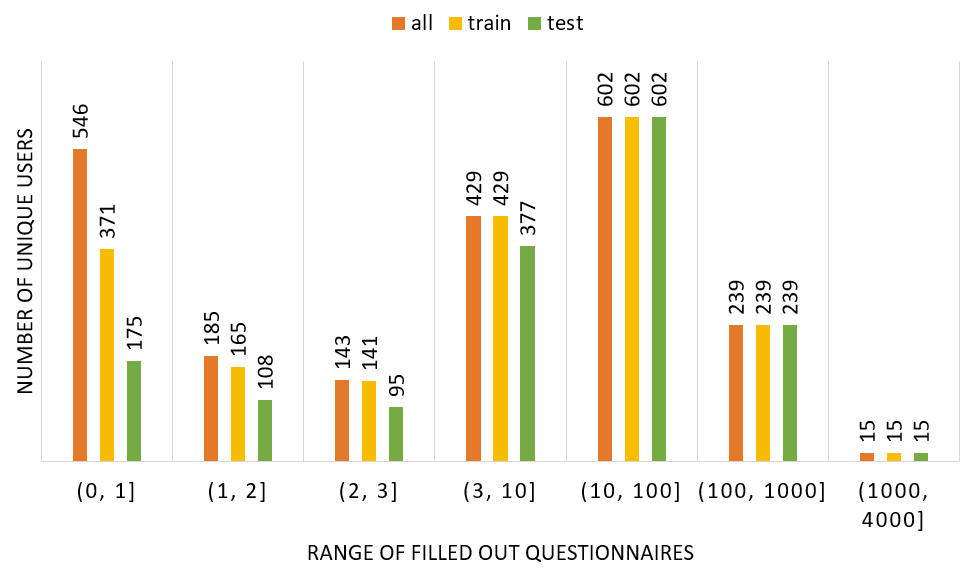

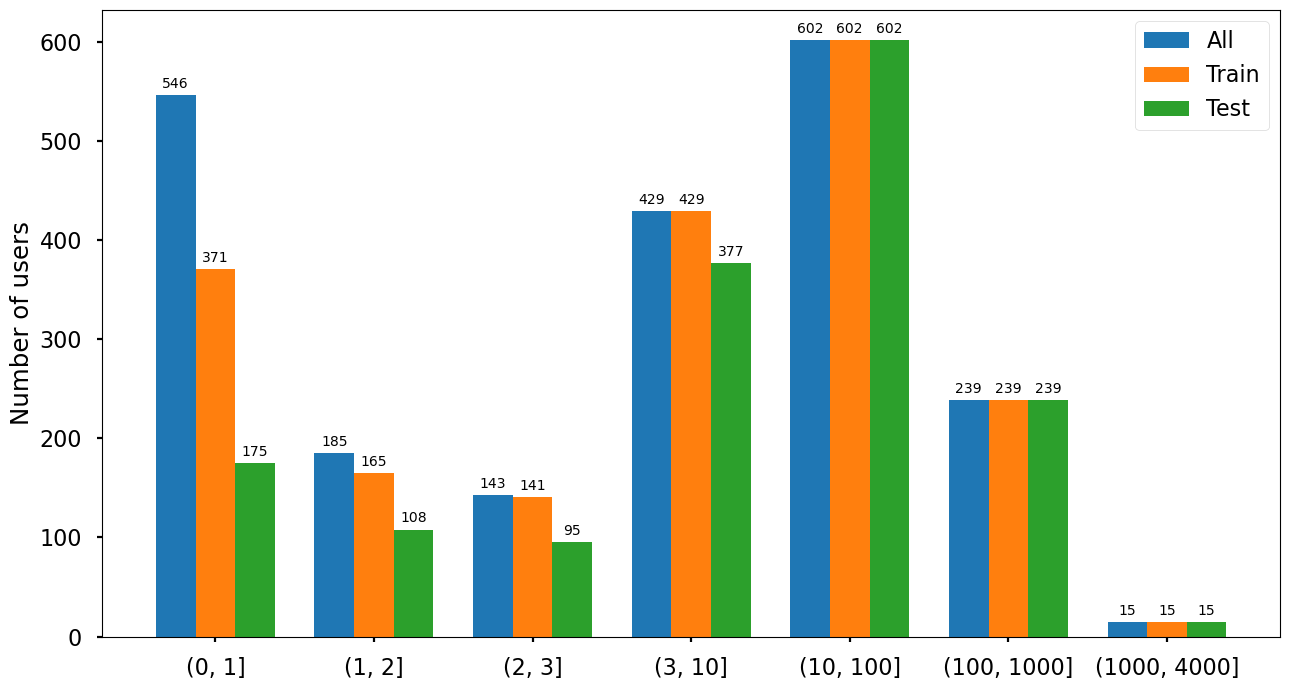

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')
plt.style.use('seaborn-poster')

labels = res.index
all_users = res['all'].values
train_users = res['train'].values
test_users = res['test'].values

x = np.arange(len(labels))  # the label locations
width = 0.25 # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(13, 7)
rects1 = ax.bar(x- width,           all_users, width, label='All')
rects2 = ax.bar(x,  train_users, width, label='Train')
rects3 = ax.bar(x + width, test_users, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of users')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.savefig(p_loc + 'results/07_plots/filled_out_questionnaires_per_users.svg')

plt.show()

In [16]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
